# Lead Scoring Case Study

## Data Reading

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset
leads_df = pd.read_csv('Leads.csv')

In [3]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking the shape
leads_df.shape

(9240, 37)

In [5]:
# data information
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# describing numerical data
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# checking for duplicates in Prospect Id and Lead number
print(sum(leads_df.duplicated(subset = 'Prospect ID')) != 0)
print(sum(leads_df.duplicated(subset = 'Lead Number')) != 0)

False
False


No duplicate entries observed

Prospect ID and Lead number are the features to uniquely identifying the person/entry, no required while doing analysis, thus can be dropped

## Exploratory Data Analysis (EDA)

### Data Cleaning

In [8]:
# to drop prospect id and lead number as they have unique values for all the entries
leads = leads_df.drop(['Prospect ID','Lead Number'],axis=1)

In [9]:
# changing all the select values into NaN values
leads = leads.replace('Select',np.nan)

In [10]:
# checking for null values
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
# nulls in percentage perspective
round((leads.isnull().sum()/len(leads.index)*100), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Lets drop all the columns with more than 45% missing values

In [12]:
# dropping the columns with more than 45% null values
for i in leads.columns:
    if(((leads[i].isnull().sum()/len(leads.index))*100) >= 45):
        leads.drop(i, axis=1, inplace = True)

In [13]:
# nulls percentage after dropping
round((leads.isnull().sum()/len(leads.index)*100), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Categorical Columns Analysis/Handling

##### Country column

In [14]:
leads.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

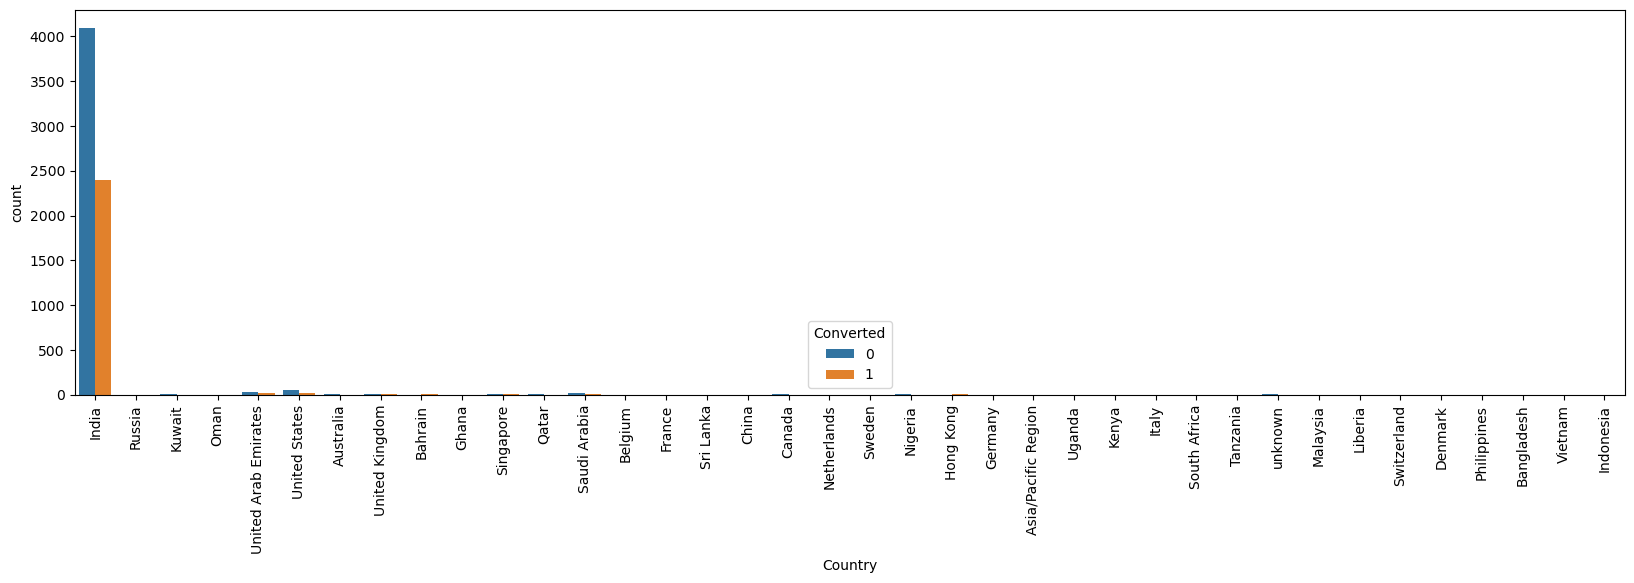

In [15]:
# plotting country column
plt.figure(figsize=(20,5))
plot = sns.countplot(leads.Country, hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

In [16]:
# As India is the most occuring value, lets impute India to the null/missing values
leads['Country'] = leads.Country.replace(np.nan,'India')

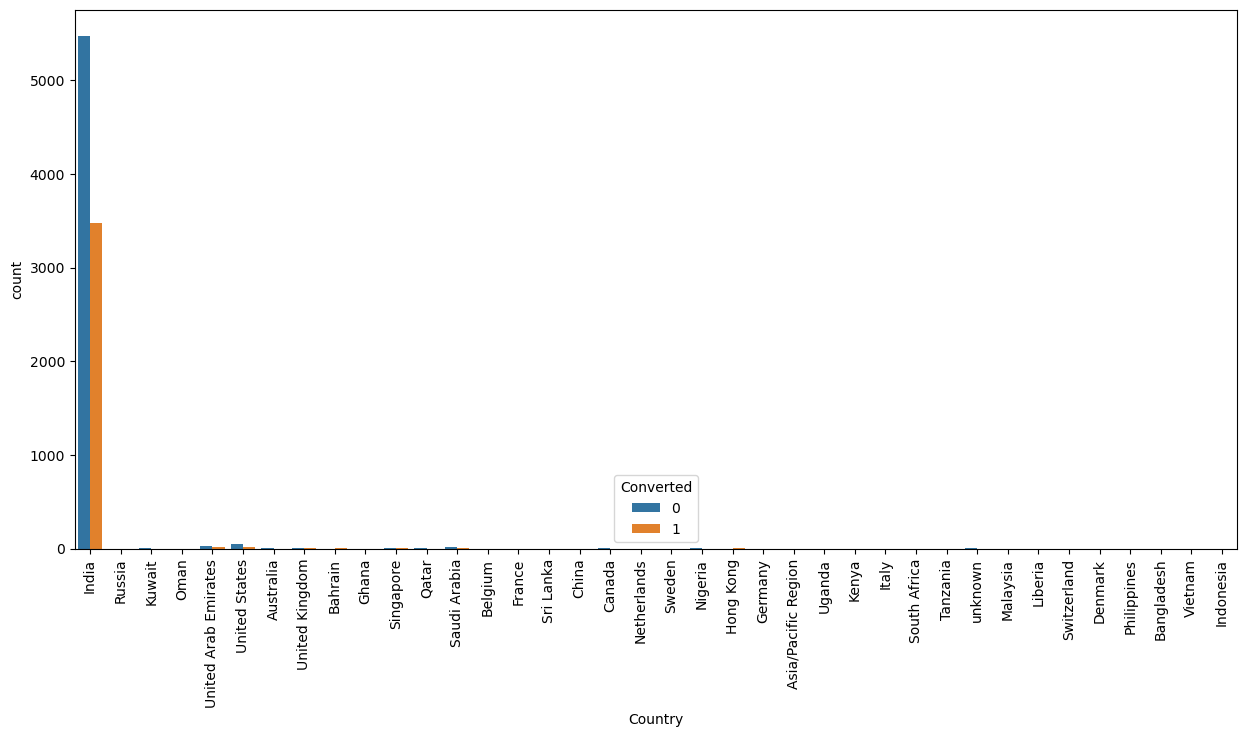

In [17]:
# plotting country column after rplacing NaN values
plt.figure(figsize=(15,7))
plot = sns.countplot(leads.Country, hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

India is the value for almost 97% of the entries, hence it won't be much useful in the analysis, thus we will be dropping the country column.

In [18]:
# list of columns to drop
drop_columns = ['Country']

##### City column

In [19]:
leads.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
# As Mumbai is the most occuring value, lets impute Mumbai to the null/missing values
leads['City'] = leads.City.replace(np.nan,'Mumbai')

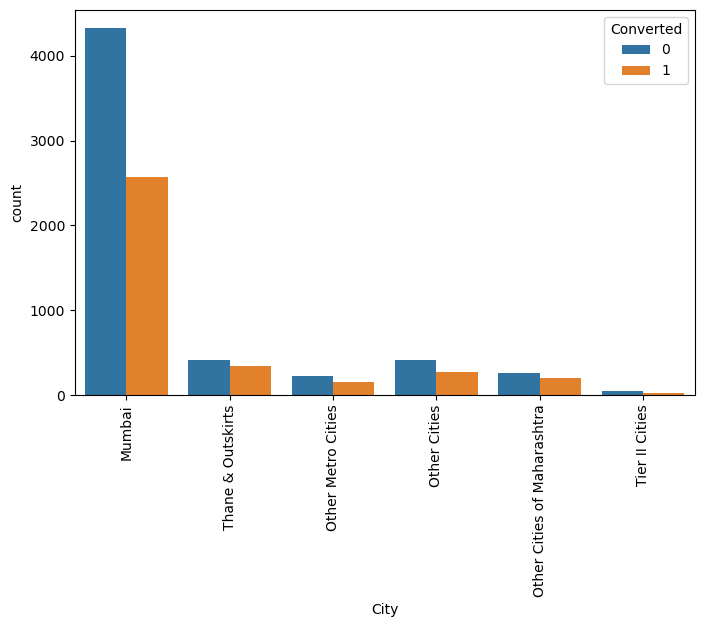

In [21]:
# plotting city column
plt.figure(figsize=(8,5))
plot = sns.countplot(leads.City, hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

##### Specialization column

In [22]:
leads.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Even though there are lots entries with specialization, this seems to be an important column for analysis. Hence lets impute null values as 'Not Specified'

In [23]:
leads['Specialization'] = leads.Specialization.replace(np.nan, 'Not Specified')

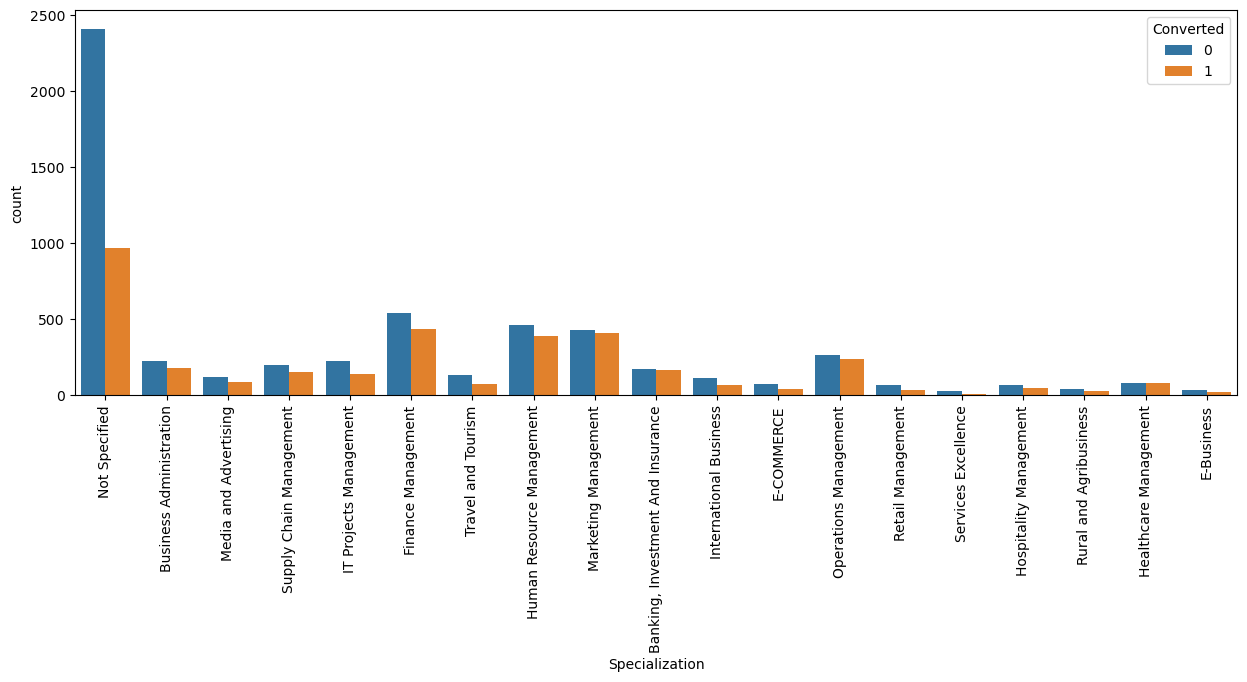

In [24]:
# plotting specialization columnn 
plt.figure(figsize=(15,5))
plot=sns.countplot(leads.Specialization, hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

 We have numerous management categories which almost have similar trends, hence lets combine all of them into single management category

In [25]:
# mixing all the management categories into one category
leads['Specialization'] = leads.Specialization.replace(['Finance Management','Human Resource Management',
                                                        'Marketing Management','Operations Management',
                                                        'IT Projects Management','Supply Chain Management',
                                                        'Healthcare Management','Hospitality Management',
                                                        'Retail Management'] ,'Management_Specializations')

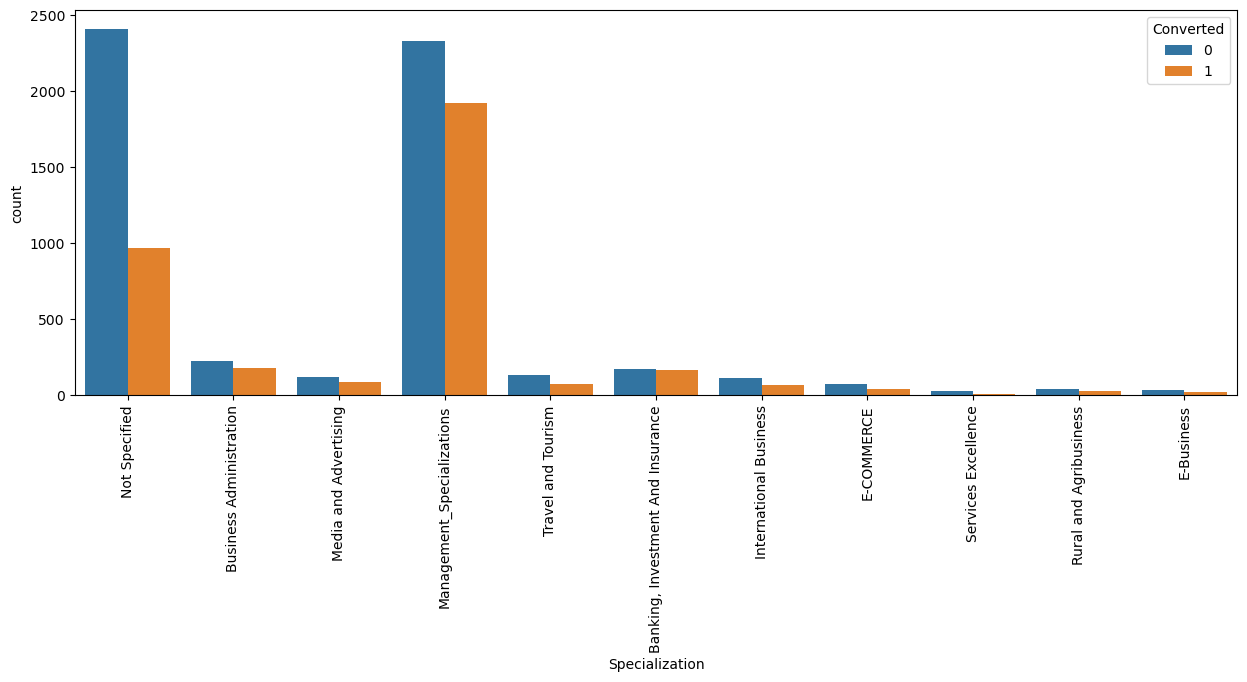

In [26]:
# plotting specialization columnn after combining management specializations
plt.figure(figsize=(15,5))
plot=sns.countplot(leads.Specialization, hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

##### What is your current occupation column

In [27]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
# As Unemployed is the most occuring value, lets impute Unemployed to the null/missing values
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [29]:
# checking the counts again
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

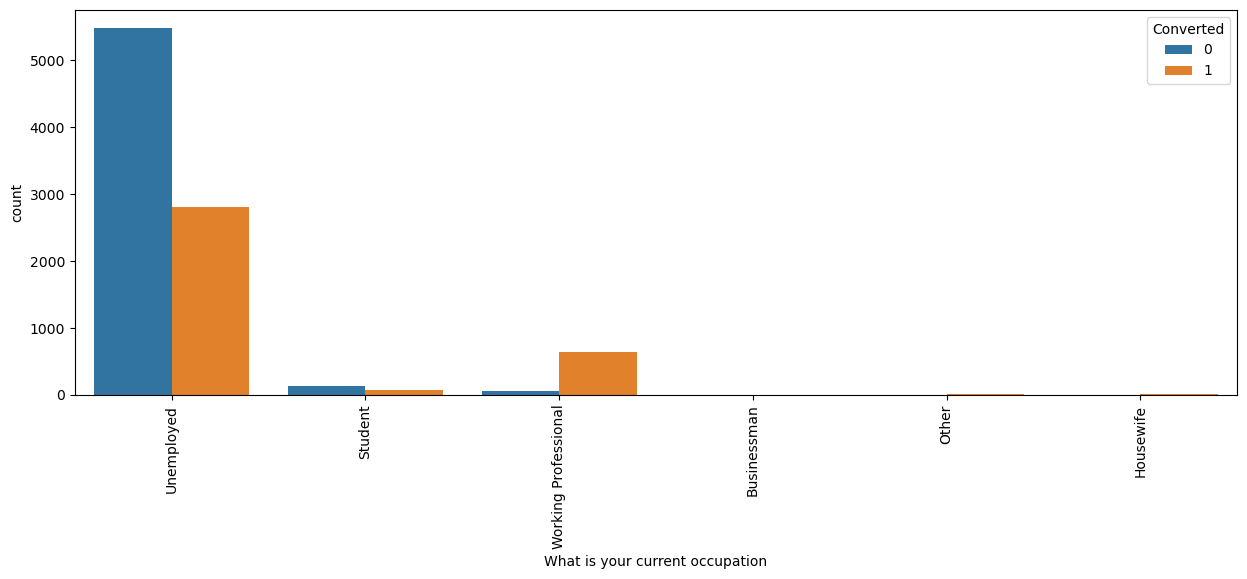

In [30]:
# plotting occupation columnn after imputing NaN values
plt.figure(figsize=(15,5))
plot=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

##### What matters most to you in choosing a course column

In [31]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [32]:
# As Better Career Prospects is the most occuring value, lets impute Better Career Prospects to the null/missing values
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [33]:
# checking value counts
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

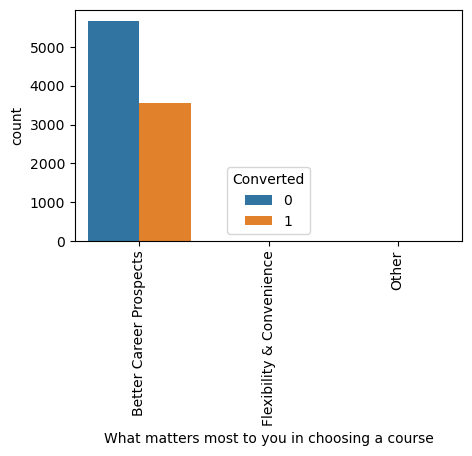

In [34]:
# plotting after imputing NaN values
plt.figure(figsize=(5,3))
plot=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

Better Career Prospects is the value for almost 99.9% of the entries, hence it won't be much useful in the analysis, thus we will be dropping this column.

In [35]:
drop_columns.append('What matters most to you in choosing a course')
drop_columns

['Country', 'What matters most to you in choosing a course']

##### Tags column

In [36]:
leads.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [37]:
# imputing NaN values with "Not Specified"
leads['Tags'] = leads.Tags.replace(np.nan,'Not Specified')

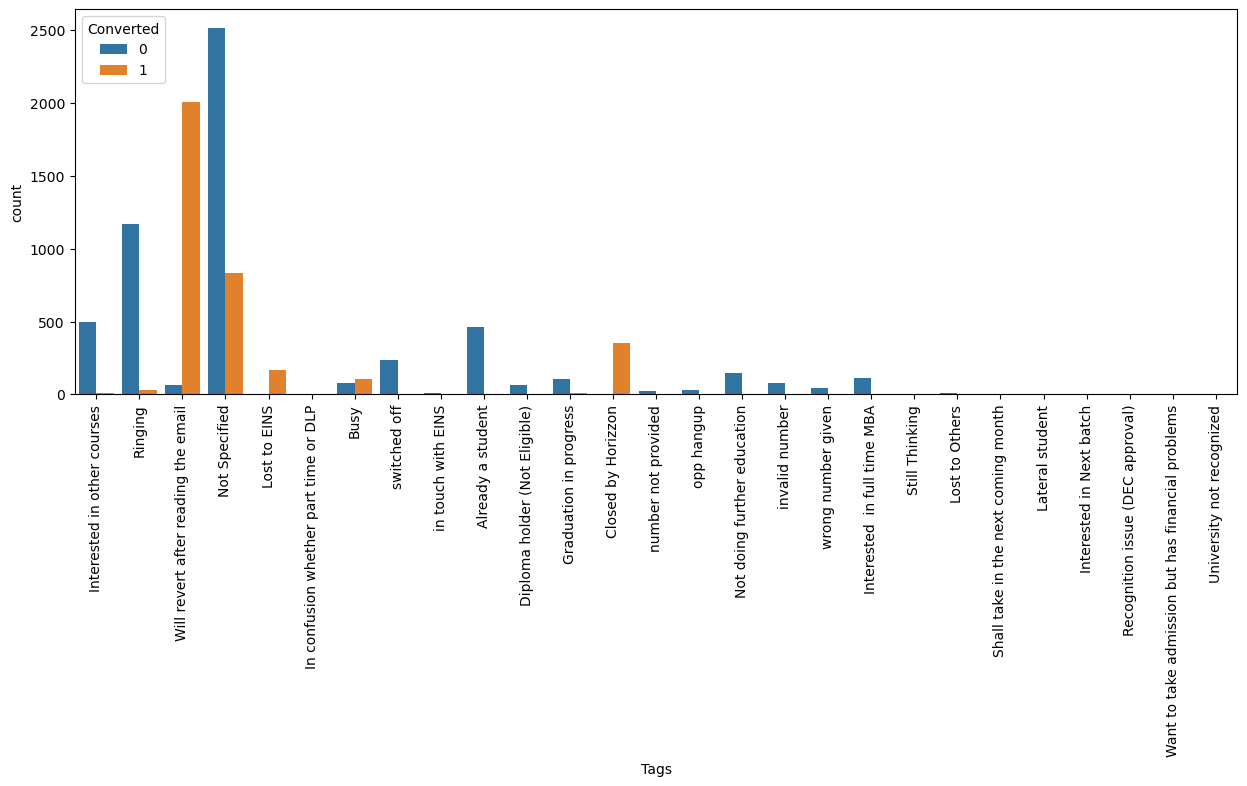

In [38]:
# plotting tags after imputing NaN values
plt.figure(figsize=(15,5))
plot = sns.countplot(leads['Tags'], hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

In [39]:
# replacing tags with lower counts with "Other Tags"
leads['Tags'] = leads.Tags.replace(['In confusion whether part time or DLP','in touch with EINS',
                                       'Diploma holder (Not Eligible)','Approached upfront','Graduation in progress',
                                       'number not provided','opp hangup','Still Thinking','Lost to Others',
                                       'Shall take in the next coming month','Lateral student','Interested in Next batch',
                                       'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                       'University not recognized','switched off','Already a student',
                                       'Not doing further education','invalid number','wrong number given',
                                       'Interested  in full time MBA'], 'Other_Tags')

In [40]:
leads.Tags.value_counts(dropna=False)

Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

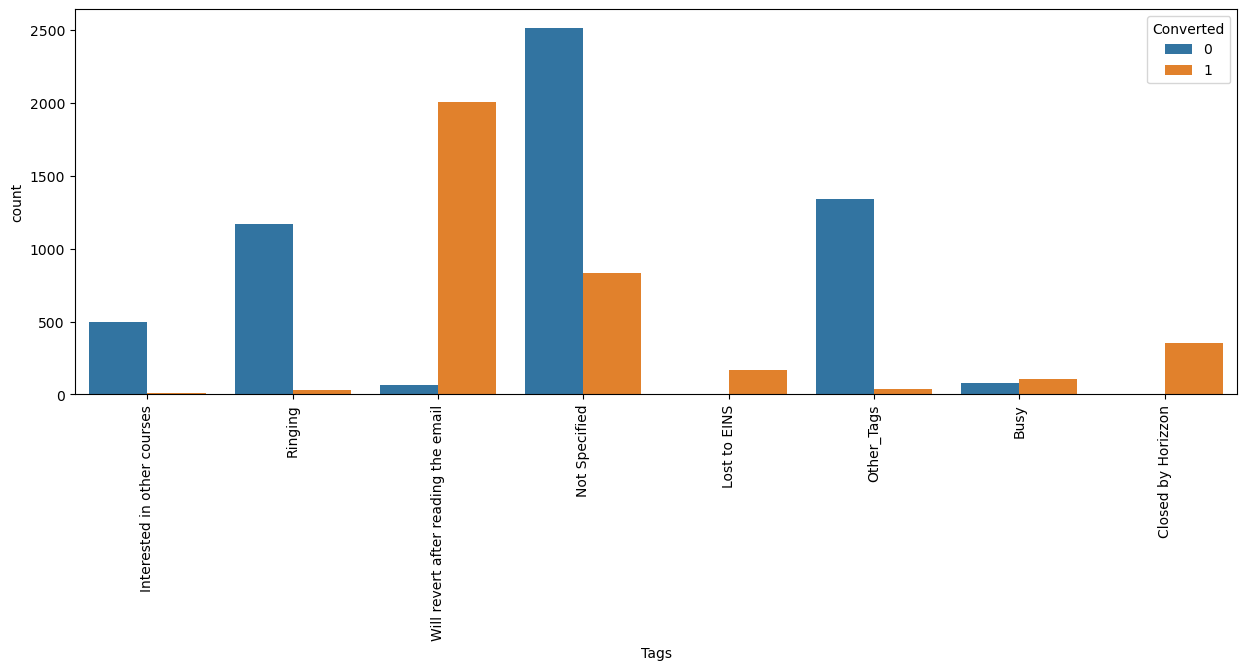

In [41]:
# plotting after coverting tags
plt.figure(figsize=(15,5))
plot = sns.countplot(leads['Tags'], hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

##### Lead Source column

In [42]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [43]:
# naming adjustment, replacing NaN values and merging low count categories
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others')

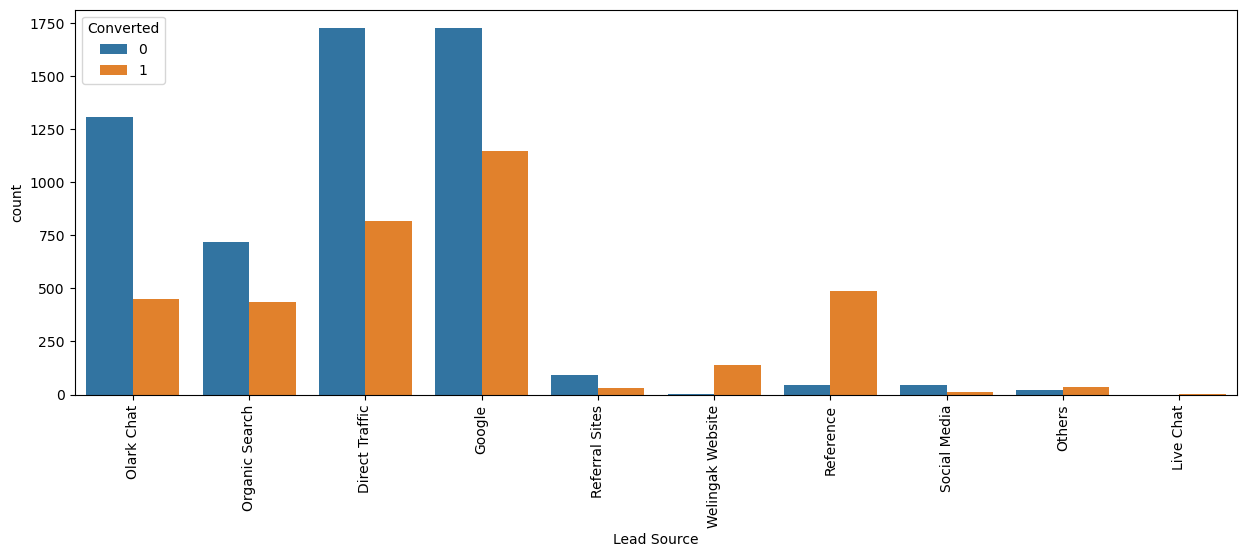

In [44]:
# plotting after on all the conversions
plt.figure(figsize=(15,5))
plot = sns.countplot(leads['Lead Source'], hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

##### Last Activity column

In [45]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [46]:
# replacing NaN values and merging low count categories
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 
                                                         'Approached upfront','View in browser link Clicked',
                                                         'Email Marked Spam','Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [47]:
# checking counts after imputing
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [48]:
# checking null value percentages
round((leads.isnull().sum()/len(leads.index)*100), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

As the NaN values are less than 2%, lets drop all the rows with NaN values, it won't affect the analysis much.

In [49]:
leads = leads.dropna()

In [50]:
# checking null value percentages
round((leads.isnull().sum()/len(leads.index)*100), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

##### Last Origin column

In [51]:
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

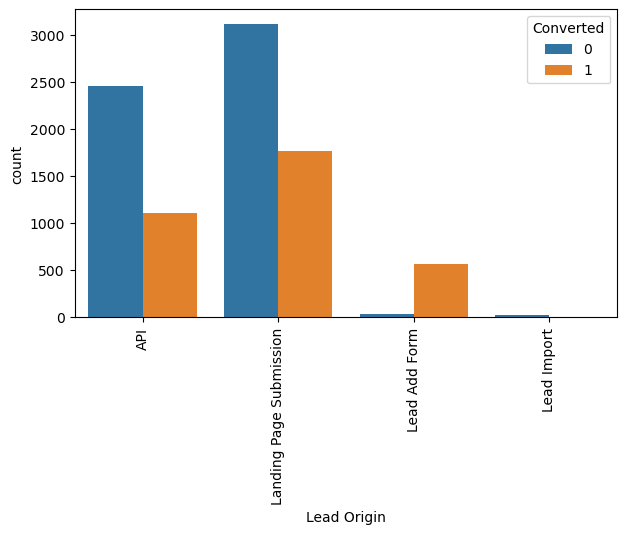

In [52]:
# plotting lead origin column
plt.figure(figsize=(7,4))
plot = sns.countplot(leads['Lead Origin'], hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

##### Do Not Email column

In [53]:
leads['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

##### Do Not Call column

In [54]:
leads['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [55]:
# Do Not Call column can be dropped as it has 99.9% of only one value and won't be useful for analysis
drop_columns.append('Do Not Call')
drop_columns

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

##### Search column

In [56]:
leads.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [57]:
# can be dropped, as only one value is dominating the counts
drop_columns.append('Search')
drop_columns

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search']

##### Magazine column

In [58]:
leads.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [59]:
# can be dropped, as only one value is dominating the counts
drop_columns.append('Magazine')
drop_columns

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine']

##### Newspaper Article column

In [60]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [61]:
# can be dropped, as only one value is dominating the counts
drop_columns.append('Newspaper Article')
drop_columns

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article']

##### X Education Forums column

In [62]:
leads['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [63]:
# can be dropped, as only one value is dominating the counts
drop_columns.append('X Education Forums')
drop_columns

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums']

##### Newspaper column

In [64]:
leads['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [65]:
# can be dropped, as only one value is dominating the counts
drop_columns.append('Newspaper')
drop_columns

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper']

##### Digital Advertisement column

In [66]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [67]:
# can be dropped, as only one value is dominating the counts
drop_columns.append('Digital Advertisement')
drop_columns

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement']

##### Through Recommendations column

In [68]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [69]:
# can be dropped, as only one value is dominating the counts
drop_columns.append('Through Recommendations')
drop_columns

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

##### Receive More Updates About Our Courses column

In [70]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [71]:
# can be dropped, as it only have one value
drop_columns.append('Receive More Updates About Our Courses')
drop_columns

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses']

##### Update me on Supply Chain Content column

In [72]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [73]:
# can be dropped, as it only have one value
drop_columns.append('Update me on Supply Chain Content')
drop_columns

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content']

##### Get updates on DM Content column

In [74]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [75]:
# can be dropped, as it only have one value
drop_columns.append('Get updates on DM Content')
drop_columns

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content']

##### I agree to pay the amount through cheque column

In [76]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [77]:
# can be dropped, as it only have one value
drop_columns.append('I agree to pay the amount through cheque')
drop_columns

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

##### A free copy of Mastering The Interview column

In [78]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

##### Last Notable Activity column

In [79]:
leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [80]:
# joining low count categories into other
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                         'Unreachable','Unsubscribed','Email Bounced',
                                                                         'Resubscribed to emails',
                                                                         'View in browser link Clicked','Approached upfront',
                                                                         'Form Submitted on Website',
                                                                         'Email Received'],'Other_Notable_activity')

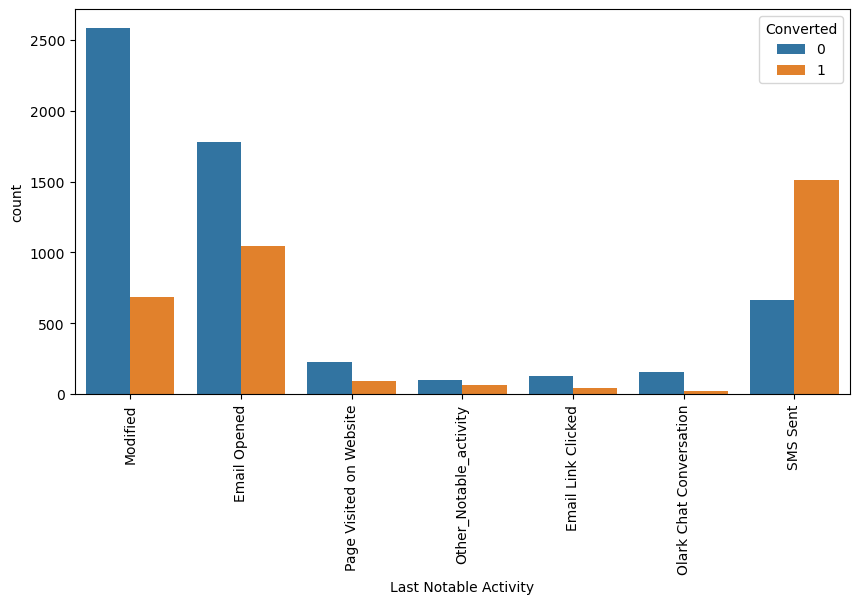

In [81]:
# plotting after conversions
plt.figure(figsize = (10,5))
plot = sns.countplot(leads['Last Notable Activity'], hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

Let us now drop the columns based on what was decided on the previous encounters

In [82]:
drop_columns

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [83]:
# dropping the above columns
leads = leads.drop(drop_columns,axis=1)

In [84]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

### Numerical Columns Analysis/Outlier Treatment

In [85]:
# Percentage of people that have Converted, value as 1
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

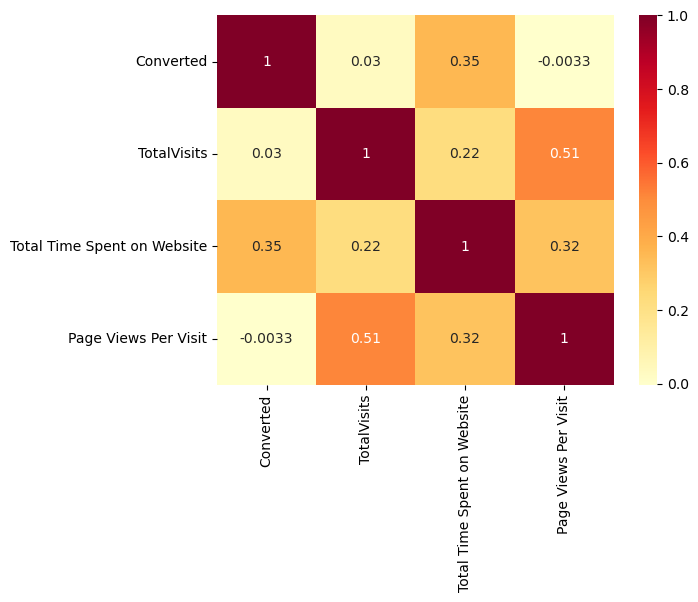

In [86]:
# plotting heatmap for numerical columns
sns.heatmap(leads.corr(), cmap="YlOrRd", annot=True)
plt.show()

##### Total Visits column

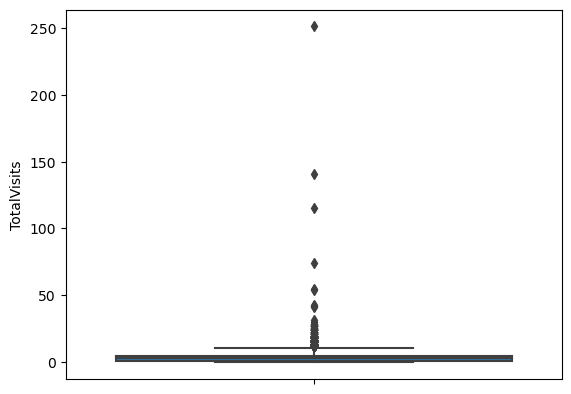

In [87]:
sns.boxplot(y=leads.TotalVisits)
plt.show()

High valued outliers, hence lets handle the column with outlier treatment

In [88]:
# checking percentile value ranges
leads.TotalVisits.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

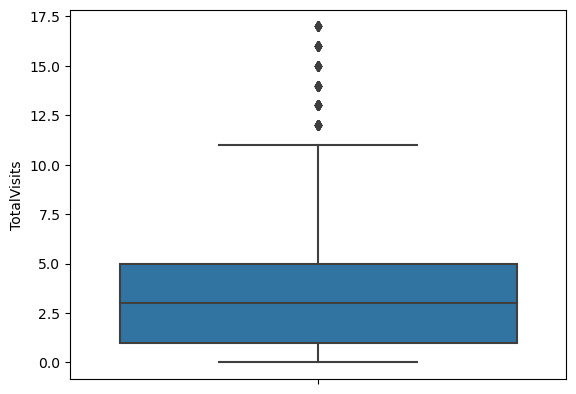

In [89]:
# removing top and bottom 1% percentile values
upperValue = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= upperValue)]
lowerValue = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= lowerValue)]
sns.boxplot(y=leads.TotalVisits)
plt.show()

##### Total Time Spent on Website column

In [90]:
leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

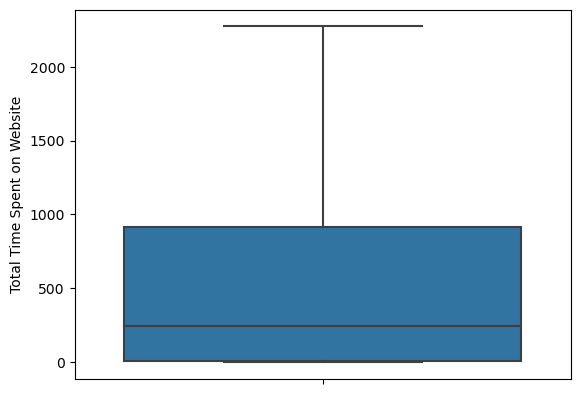

In [91]:
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

No outliers, outlier treatment is not required

##### Page Views Per Visit column

In [92]:
leads['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

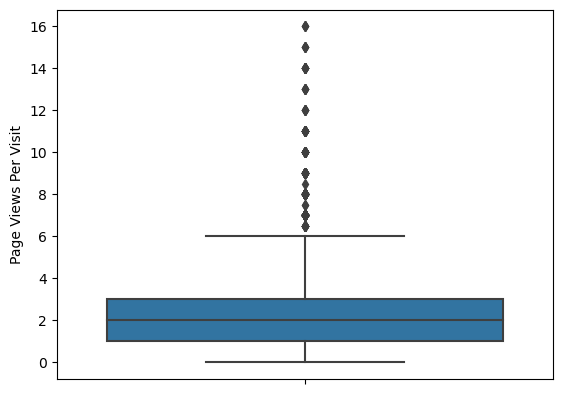

In [93]:
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

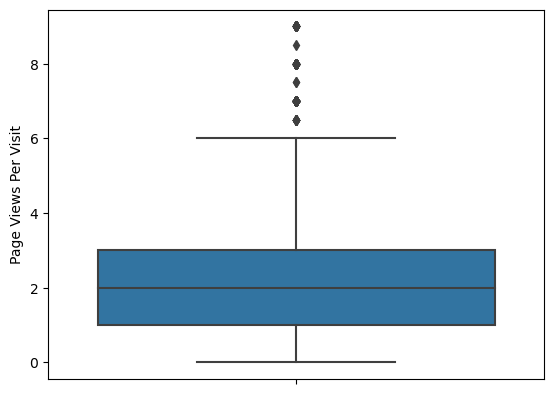

In [94]:
# outlier treatment, removing top and bottom 1% percentile values
upperValue = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= upperValue]
lowerValue = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= lowerValue]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

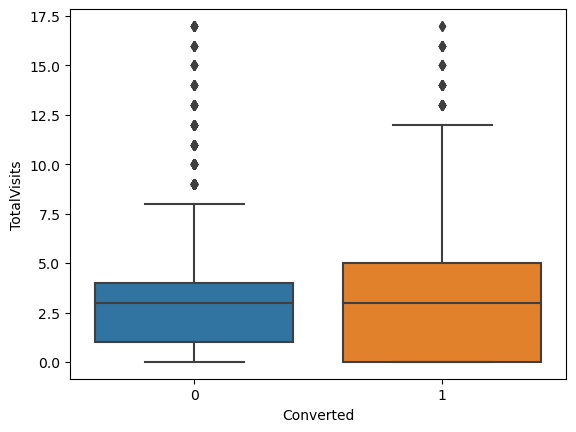

In [95]:
# plotting box plots with converted column as hue
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

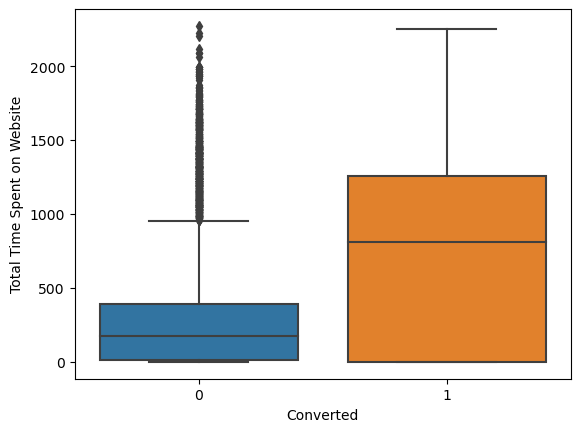

In [96]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

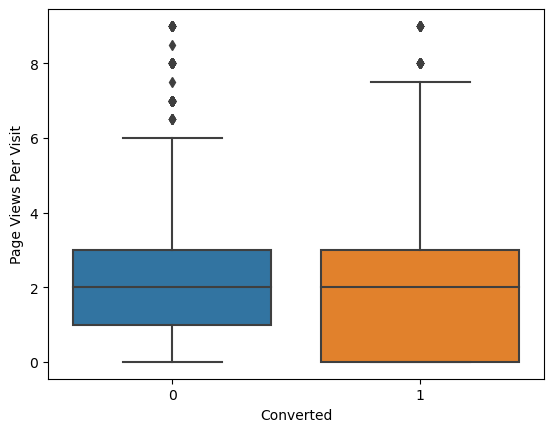

In [97]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

In [98]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

## Data Preprocessing for Modeling

### Dummy Variable Creation

In [99]:
# list of categorical columns
categorical_columns = leads.select_dtypes(include=['object']).columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [100]:
# variable to map (Yes:1 & No:0)
leads['Do Not Email'] = leads['Do Not Email'].apply(lambda x: 1 if x=='Yes' else 0)
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [101]:
leads.dtypes[['A free copy of Mastering The Interview','Do Not Email']]

A free copy of Mastering The Interview    int64
Do Not Email                              int64
dtype: object

Now, we will create dummies, remove the first column and then add them to the dataframe

In [102]:
dummy1 = pd.get_dummies(leads[['Lead Origin','What is your current occupation','City']], drop_first=True)
leads = pd.concat([leads,dummy1],axis = 1)

dummy2 = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy2 = dummy2.drop(['Specialization_Not Specified'], axis = 1)
leads = pd.concat([leads, dummy2], axis = 1)

dummy3 = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy3 = dummy3.drop(['Lead Source_Others'], axis = 1)
leads = pd.concat([leads, dummy3], axis = 1)

dummy4 = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy4 = dummy4.drop(['Last Activity_Others'], axis = 1)
leads = pd.concat([leads, dummy4], axis = 1)

dummy5 = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy5 = dummy5.drop(['Last Notable Activity_Other_Notable_activity'], axis = 1)
leads = pd.concat([leads, dummy5], axis = 1)

dummy6 = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy6 = dummy6.drop(['Tags_Not Specified'], axis = 1)
leads = pd.concat([leads, dummy6], axis = 1)

In [103]:
# removing the main categorical columns
leads.drop(categorical_columns,axis=1,inplace=True)

In [104]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Train - Test Split

In [105]:
# defining variables before split
y = leads.Converted
X = leads.drop('Converted',axis=1)

In [106]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [107]:
X_train.shape

(6267, 56)

In [108]:
X_test.shape

(2686, 56)

In [109]:
y_train.shape

(6267,)

In [110]:
y_test.shape

(2686,)

### Data Scaling

In [111]:
# using scaler function
scaler = StandardScaler()
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## Model Building

### RFE & Stats Model

In [112]:
# logistic regression
lg = LogisticRegression()

rfe = RFE(lg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [113]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True])

In [114]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 28),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [115]:
# list of RFE top 15 columns
rfe_columns = X_train.columns[rfe.support_]
rfe_columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

#### Model 1

In [116]:
# stats model 1
X_train_sm1 = sm.add_constant(X_train[rfe_columns])
lgm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial())
m1 = lgm1.fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Wed, 11 Oct 2023   Deviance:                       2509.3
Time:                        19:03:33   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6048
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
=================================================================================================================
"""

p-value of 'Lead Source_Referral Sites' is high, lets build the model by removing this column

#### Model 2

In [117]:
# removing high p-value column
rfe_columns = rfe_columns.drop('Lead Source_Referral Sites',1)

In [118]:
# stats model 2
X_train_sm2 = sm.add_constant(X_train[rfe_columns])
lgm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial())
m2 = lgm2.fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Wed, 11 Oct 2023   Deviance:                       2510.7
Time:                        19:03:34   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6047
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
=================================================================================================================
"""

As all the p-values are very low, we can try to check the VIF values (Variance Inflation Factor) for these columns on whether they have any high correlations among them. 

In [119]:
# VIF checking for the above model columns
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
5,Last Notable Activity_Modified,1.69
13,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
11,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
8,Tags_Closed by Horizzon,1.21


'Last Notable Activity_SMS Sent' & 'Last Activity_SMS Sent' have high VIF values, let us remove a column with highest values and continue to build the model.

#### Model 3

In [120]:
# removing high VIF value column
rfe_columns = rfe_columns.drop('Last Notable Activity_SMS Sent',1)

In [121]:
# stats model 3
X_train_sm3 = sm.add_constant(X_train[rfe_columns])
lgm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial())
m3 = lgm3.fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Wed, 11 Oct 2023   Deviance:                       2526.6
Time:                        19:03:34   Pearson chi2:                 8.51e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6037
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1179      0.084    -13.382      0.000      -1.282      -0.954
Total Time Spent on Website                       0.8896      0.053     16.907      0.000       0.786       0.993
Lead Origin_Lead Add Form                         1.6630      0.455      3.657      0.000       0.772       2.554
Lead Source_Direct Traffic                       -0.8212      0.127     -6.471      0.000      -1.070      -0.572
Lead Source_Welingak Website                      3.8845      1.114      3.488      0.000       1.701       6.068
Last Activity_SMS Sent                            1.9981      0.113     17.718      0.000       1.777       2.219
Last Notable Activity_Modified                   -1.6525      0.124    -13.279      0.000      -1.896      -1.409
Last Notable Activity_Olark Chat Conversation    -1.8023      0.491     -3.669      0.000      -2.765      -0.839
Tags_Closed by Horizzon                           7.1955      1.020      7.053      0.000       5.196       9.195
Tags_Interested in other courses                 -2.1318      0.406     -5.253      0.000      -2.927      -1.336
Tags_Lost to EINS                                 5.9177      0.611      9.689      0.000       4.721       7.115
Tags_Other_Tags                                  -2.3737      0.206    -11.507      0.000      -2.778      -1.969
Tags_Ringing                                     -3.4531      0.238    -14.532      0.000      -3.919      -2.987
Tags_Will revert after reading the email          4.5070      0.188     24.002      0.000       4.139       4.875
=================================================================================================================
"""

In [122]:
# VIF checking for the above model columns
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
12,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
5,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
10,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.21
11,Tags_Ringing,1.16


All the VIF values seems to be low and we already have low p-values. We can consider the above as final feature columns.

### Predictions & Probabilities

In [123]:
# predicting values for train set
y_train_pred = m3.predict(X_train_sm3)
y_train_pred[:10]

9196    0.283149
4696    0.031440
3274    0.576636
2164    0.006433
1667    0.989105
7024    0.130813
8018    0.024219
778     0.205594
6942    0.002678
4440    0.096716
dtype: float64

In [124]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [125]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.283149,9196
1,0,0.031440,4696
2,0,0.576636,3274
3,0,0.006433,2164
4,1,0.989105,1667


In [126]:
# predicted column values
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.283149,9196,0
1,0,0.031440,4696,0
2,0,0.576636,3274,1
3,0,0.006433,2164,0
4,1,0.989105,1667,1


In [127]:
# creating confusion matrix
cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(cm)

[[3693  189]
 [ 281 2104]]


In [128]:
# accuracy of the model
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9250039891495133

In [129]:
# positives & negatives from confusion matrix
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [130]:
# sensititvity
sensitivity = TP / float(TP+FN)
sensitivity

0.8821802935010482

In [131]:
# specificity
specificity = TN / float(TN+FP)
specificity

0.9513137557959814

In [132]:
# False positive rate(FPR) - predicting that customer will convert when they do not convert
FPR = FP / float(TN+FP)
FPR

0.04868624420401855

In [133]:
# True Negative rate(TNR) - predicting that customer will not convert when they will actually convert
TNR = FN / float(FN+TP)
TNR

0.11781970649895178

In [134]:
# positive predicition value
TP / float(TP+FP)

0.9175752289576974

In [135]:
# negative prediction value
TN / float(TN+FN)

0.9292903875188727

#### Plotting ROC Curve

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

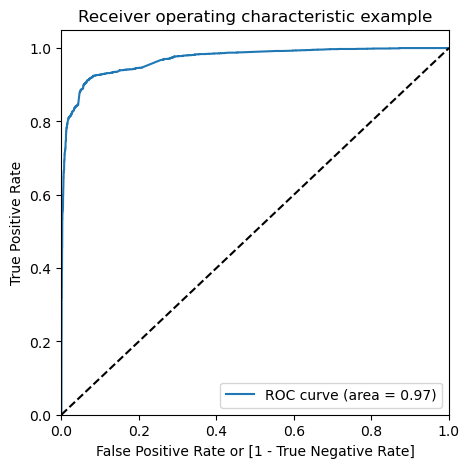

In [138]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Curve is close to 1 and area is 0.97, seems to be a good predictive model

#### Finding Optimal Cutoff Point

Earlier 0.5 was chosen as cutoff point above but we need to identify the best cutoff point.

In [139]:
# creating columns with different probability cutoff values 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [140]:
# Calculate accuracy sensitivity and specificity for various probability cutoff values.
cutoff_df = pd.DataFrame(columns = ['Probability','Accuracy','Sensitivity','Specificity'])

cut_offs = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in cut_offs:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensitivity,specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.380565     1.000000     0.000000
0.1          0.1  0.816180     0.971488     0.720762
0.2          0.2  0.901069     0.931237     0.882535
0.3          0.3  0.922930     0.916981     0.926584
0.4          0.4  0.925802     0.901468     0.940752
0.5          0.5  0.925004     0.882180     0.951314
0.6          0.6  0.915909     0.828092     0.969861
0.7          0.7  0.916228     0.810063     0.981453
0.8          0.8  0.906335     0.774843     0.987120
0.9          0.9  0.887027     0.718239     0.990726


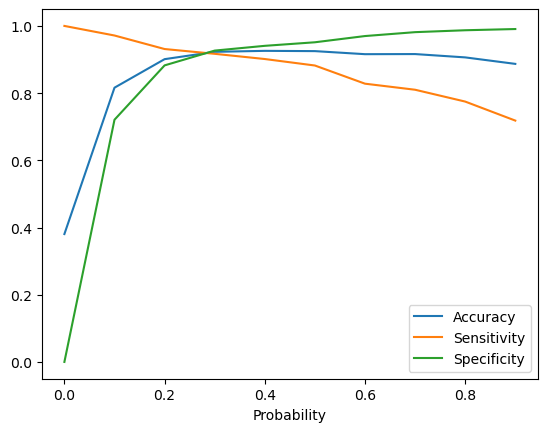

In [141]:
# plotting accuracy sensitivity and specificity for the cutoff probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [142]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [143]:
# calculating lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.283149,9196,0,28
1,0,0.031440,4696,0,3
2,0,0.576636,3274,1,58
3,0,0.006433,2164,0,1
4,1,0.989105,1667,1,99


In [144]:
# creating confusion matrix
cm2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
print(cm2)

[[3597  285]
 [ 198 2187]]


In [145]:
# accuracy of the model
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.922929631402585

In [146]:
# positives & negatives from confusion matrix
TP = cm2[1,1] # true positive 
TN = cm2[0,0] # true negatives
FP = cm2[0,1] # false positives
FN = cm2[1,0] # false negatives

In [147]:
# sensititvity
sensitivity = TP / float(TP+FN)
sensitivity

0.9169811320754717

In [148]:
# specificity
specificity = TN / float(TN+FP)
specificity

0.9265842349304482

In [149]:
# False positive rate(FPR) - predicting that customer will convert when they do not convert
FPR = FP / float(TN+FP)
FPR

0.07341576506955177

In [150]:
# True Negative rate(TNR) - predicting that customer will not convert when they will actually convert
TNR = FN / float(FN+TP)
TNR

0.0830188679245283

In [151]:
# positive predicition value
TP / float(TP+FP)

0.8847087378640777

In [152]:
# negative prediction value
TN / float(TN+FN)

0.9478260869565217

#### Precision & Recall

In [153]:
Precision = TP / float(TP + FP)
Precision

0.8847087378640777

In [154]:
Recall = TP / float(TP + FN)
Recall

0.9169811320754717

using precision and recall score library functions from sklearn

In [155]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8847087378640777

In [156]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9169811320754717

Same as calculated value above

#### Precision Recall Curve

In [157]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

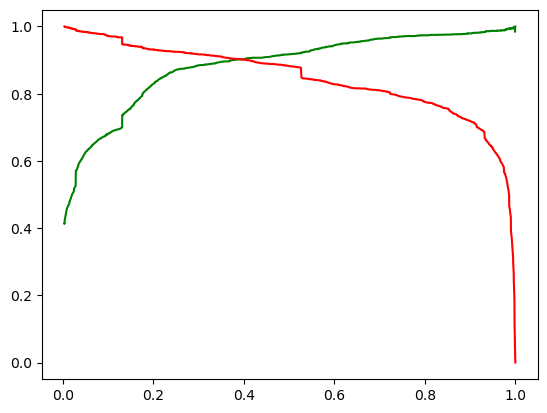

In [158]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Testing on Test Data

In [159]:
# scaling the test data set
numerical_columns = X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.668862,-0.304384,0.135997,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,-0.030697,-0.538073,0.399961,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,-0.380477,0.794688,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,0.319082,-0.614753,-0.127967,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,-0.030697,-0.412100,0.399961,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [160]:
X_test = X_test[rfe_columns]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.304384,0,1,0,1,0,0,0,0,0,0,1,0
984,-0.538073,0,0,0,1,1,0,0,0,0,1,0,0
8135,0.794688,0,1,0,1,0,0,0,0,0,0,0,0
6915,-0.614753,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.412100,0,0,0,0,0,0,0,0,0,0,0,1


In [161]:
X_test_sm = sm.add_constant(X_test)

In [162]:
# test data predictions
y_test_pred = m3.predict(X_test_sm)

In [163]:
y_test_pred[:10]

7681    0.024968
984     0.025965
8135    0.682639
6915    0.005953
2712    0.953578
244     0.002388
4698    0.014927
8287    0.028022
6791    0.981374
8970    0.005736
dtype: float64

In [164]:
# adding y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [165]:
y_pred_1.head()

,0
7681,0.024968
984,0.025965
8135,0.682639
6915,0.005953
2712,0.953578


In [166]:
# Changing y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [167]:
# adding the prospect ID column
y_test_df['Prospect ID'] = y_test_df.index

In [168]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [169]:
# Concatinating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [170]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.024968
1,0,984,0.025965
2,0,8135,0.682639
3,0,6915,0.005953
4,1,2712,0.953578


In [171]:
# Renaming the last column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [172]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.024968
1,0,984,0.025965
2,0,8135,0.682639
3,0,6915,0.005953
4,1,2712,0.953578


In [173]:
# rearranging and lead score calculation
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [174]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.024968,2
1,984,0,0.025965,3
2,8135,0,0.682639,68
3,6915,0,0.005953,1
4,2712,1,0.953578,95


In [175]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [176]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.024968,2,0
1,984,0,0.025965,3,0
2,8135,0,0.682639,68,1
3,6915,0,0.005953,1,0
4,2712,1,0.953578,95,1


In [177]:
# accuracy check
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9270290394638868

In [178]:
cm3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
cm3

array([[1564,  112],
       [  84,  926]], dtype=int64)

In [179]:
TP = cm3[1,1] # true positive 
TN = cm3[0,0] # true negatives
FP = cm3[0,1] # false positives
FN = cm3[1,0] # false negatives

In [180]:
# sensititvity
sensitivity = TP / float(TP+FN)
sensitivity

0.9168316831683169

In [181]:
# specificity
specificity = TN / float(TN+FP)
specificity

0.9331742243436754

In [182]:
# Precision
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8921001926782274

In [183]:
# Recall
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9168316831683169

## Final Observations

Comparing Train and Test Data

<b>Train Data :</b>
- Accuracy      : 92.29%
- Sensitivity   : 91.69%
- Specificity   : 92.65%
- Precision     : 88.47%
- Recall        : 91.69%

<b>Test Data :</b>
- Accuracy      : 92.70%
- Sensitivity   : 91.68%
- Specificity   : 93.31%
- Precision     : 89.21%
- Recall        : 91.68%